# Processing of COVID-19 raw data for US counties

This script combines, filters, and sorts numerous .csv files containing daily COVID-19 counts for US counties starting from October 31st 2020 and ending in February 13th, 2022.


#### 1. Examine a single .csv file
- get the idea of what the data looks like

In [13]:
import pandas as pd
import os
import seaborn as sb
import matplotlib.pyplot as plt

single_csv_path = r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\raw_data\Covid19_data\04-11-2021.csv'
df = pd.read_csv(single_csv_path)
df.head(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-04-12 04:21:00,33.93911,67.709953,57160,2521,51989.0,2650.0,Afghanistan,146.833897,4.410427
1,NaN,NaN,NaN,Albania,2021-04-12 04:21:00,41.15330,20.168300,128393,2317,97723.0,28353.0,Albania,4461.498367,1.804616
2,NaN,NaN,NaN,Algeria,2021-04-12 04:21:00,28.03390,1.659600,118516,3130,82600.0,32786.0,Algeria,270.269512,2.640994
3,NaN,NaN,NaN,Andorra,2021-04-12 04:21:00,42.50630,1.521800,12545,120,11825.0,600.0,Andorra,16236.329515,0.956556
4,NaN,NaN,NaN,Angola,2021-04-12 04:21:00,-11.20270,17.873900,23457,553,22058.0,846.0,Angola,71.371048,2.357505
5,NaN,NaN,NaN,Antigua and Barbuda,2021-04-12 04:21:00,17.06080,-61.796400,1198,30,938.0,230.0,Antigua and Barbuda,1223.347766,2.504174
6,NaN,NaN,NaN,Argentina,2021-04-12 04:21:00,-38.41610,-63.616700,2532562,57779,2233140.0,241643.0,Argentina,5603.536808,2.281445
7,NaN,NaN,NaN,Armenia,2021-04-12 04:21:00,40.06910,45.038200,202817,3735,181963.0,17119.0,Armenia,6844.447654,1.841562
8,NaN,NaN,Australian Capital Territory,Australia,2021-04-12 04:21:00,-35.47350,149.012400,123,3,120.0,0.0,"Australian Capital Territory, Australia",28.731605,2.439024
9,NaN,NaN,New South Wales,Australia,2021-04-12 04:21:00,-33.86880,151.209300,5339,54,0.0,5285.0,"New South Wales, Australia",65.767430,1.011425


This table clearly contains data for many countries. We will here limit it to only USA counties, that is, we will only keep rows containing FIPS numbers.

In [14]:
df_USA = df[df['FIPS'].notna()]
df_USA.head(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
651,1001.0,Autauga,Alabama,US,2021-04-12 04:21:00,32.539527,-86.644082,6723,103,NaN,NaN,"Autauga, Alabama, US",12033.506954,1.532054
652,1003.0,Baldwin,Alabama,US,2021-04-12 04:21:00,30.727750,-87.722071,20631,300,NaN,NaN,"Baldwin, Alabama, US",9241.871758,1.454122
653,1005.0,Barbour,Alabama,US,2021-04-12 04:21:00,31.868263,-85.387129,2247,55,NaN,NaN,"Barbour, Alabama, US",9102.325205,2.447708
654,1007.0,Bibb,Alabama,US,2021-04-12 04:21:00,32.996421,-87.125115,2562,58,NaN,NaN,"Bibb, Alabama, US",11440.564437,2.263856
655,1009.0,Blount,Alabama,US,2021-04-12 04:21:00,33.982109,-86.567906,6483,135,NaN,NaN,"Blount, Alabama, US",11211.219866,2.082369
656,1011.0,Bullock,Alabama,US,2021-04-12 04:21:00,32.100305,-85.712655,1213,40,NaN,NaN,"Bullock, Alabama, US",12008.712009,3.297609
657,1013.0,Butler,Alabama,US,2021-04-12 04:21:00,31.753001,-86.680575,2122,66,NaN,NaN,"Butler, Alabama, US",10911.147676,3.110273
658,1015.0,Calhoun,Alabama,US,2021-04-12 04:21:00,33.774837,-85.826304,14284,311,NaN,NaN,"Calhoun, Alabama, US",12573.390256,2.177261
659,1017.0,Chambers,Alabama,US,2021-04-12 04:21:00,32.913601,-85.390727,3499,122,NaN,NaN,"Chambers, Alabama, US",10522.042461,3.486710
660,1019.0,Cherokee,Alabama,US,2021-04-12 04:21:00,34.178060,-85.606390,1820,44,NaN,NaN,"Cherokee, Alabama, US",6947.625592,2.417582


Important columns for us are FIPS numbers, County, State, Country, Last Updated, Confirmed, Deaths, and Combined Key.
FIPS, Confirmed and Deaths should be integer, Last updated should be formatted as date (time is not needed), and the remaining columns are string.
This will all be applied once all the .csv files are merged together.

#### 2. Merge single date .csv files

In [15]:
# replace with your folder's path
folder_path = r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\raw_data\Covid19_data'

all_files = os.listdir(folder_path)

# Filter out non-CSV files
csv_files = [f for f in all_files if f.endswith('.csv')]

# Create a list to hold the dataframes
df_list = []

for csv in csv_files:
    file_path = os.path.join(folder_path, csv)
    try:
        # Try reading the file using default UTF-8 encoding
        df = pd.read_csv(file_path)
        df_list.append(df)
    except UnicodeDecodeError:
        try:
            # If UTF-8 fails, try reading the file using UTF-16 encoding with tab separator
            df = pd.read_csv(file_path, sep='\t', encoding='utf-16')
            df_list.append(df)
        except Exception as e:
            print(f"Could not read file {csv} because of error: {e}")
    except Exception as e:
        print(f"Could not read file {csv} because of error: {e}")

# Concatenate all data into one DataFrame
big_df = pd.concat(df_list, ignore_index=True)

# Save the final result to a new CSV file
save_path = r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\raw_data'
big_df.to_csv(os.path.join(save_path, 'combined_file.csv'), index=False)

#### 3. Examine, sort, clean, and filter combined data frame
Now that we have this big, combined data frame, we should examine, sort and filter it.
The goal is to sort the data by county (using FIPS and not county name, as there can be several counties with the same name in different sates)), and than sort the single county data by dates.
We should also change data types where needed, as previously indicated for a single .csv file.

In [ ]:
# if the data is not loaded:
combined_raw_path = r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\raw_data\combined_file.csv'
big_df = pd.read_csv(combined_raw_path)

In [20]:
big_df.head(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513,2201,41727.0,8585.0,Afghanistan,134.896578,4.191343,NaN,NaN
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634.0,23501.0,Albania,2026.409062,2.025173,NaN,NaN
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395.0,29740.0,Algeria,227.809861,2.764848,NaN,NaN
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463.0,570.0,Andorra,10505.403482,1.034865,NaN,NaN
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146.0,6017.0,Angola,53.452981,2.305328,NaN,NaN
5,NaN,NaN,NaN,Antigua and Barbuda,2021-01-02 05:22:33,17.06080,-61.796400,159,5,148.0,6.0,Antigua and Barbuda,162.364186,3.144654,NaN,NaN
6,NaN,NaN,NaN,Argentina,2021-01-02 05:22:33,-38.41610,-63.616700,1629594,43319,1426676.0,159599.0,Argentina,3605.633332,2.658269,NaN,NaN
7,NaN,NaN,NaN,Armenia,2021-01-02 05:22:33,40.06910,45.038200,159738,2828,143355.0,13555.0,Armenia,5390.664389,1.770399,NaN,NaN
8,NaN,NaN,Australian Capital Territory,Australia,2021-01-02 05:22:33,-35.47350,149.012400,118,3,114.0,1.0,"Australian Capital Territory, Australia",27.563653,2.542373,NaN,NaN
9,NaN,NaN,New South Wales,Australia,2021-01-02 05:22:33,-33.86880,151.209300,4947,54,0.0,4893.0,"New South Wales, Australia",60.938655,1.091571,NaN,NaN


In [18]:
big_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FIPS,1538488.0,32400.708711,18035.216413,60.0000,19049.000000,30067.000000,47041.000000,9.999900e+04
Lat,1844762.0,35.789114,13.334104,-71.9499,33.205219,37.901449,42.176955,7.170690e+01
Long_,1844762.0,-71.274113,54.949434,-178.1165,-96.580954,-86.740722,-77.382992,1.780650e+02
Confirmed,1886704.0,45882.860633,283708.216141,-302844.0000,1119.000000,3383.000000,13727.000000,2.116224e+07
Deaths,1886704.0,927.949689,5556.113037,0.0000,17.000000,57.000000,206.000000,1.614890e+05
Recovered,619782.0,34348.827523,198237.561482,0.0000,0.000000,0.000000,253.000000,6.399531e+06
Active,619782.0,14898.239765,119491.602840,0.0000,479.000000,1609.000000,5815.000000,5.658278e+06
Incident_Rate,1809153.0,10130.824459,6290.327903,0.0000,5808.925994,9742.850073,13671.957672,2.164022e+06
Case_Fatality_Ratio,1830309.0,2.580329,46.267909,0.0000,1.102281,1.643631,2.342918,2.960000e+04
Incidence_Rate,35127.0,2677.968350,1883.597526,0.0000,1320.648663,2420.203437,3671.385699,1.808200e+04


Let's only keep data for the US (i.e., data containing FIPS fields):

In [21]:
big_df_USA = big_df[big_df['FIPS'].notna()]
big_df_USA.head(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Incidence_Rate,Case-Fatality_Ratio
648,1001.0,Autauga,Alabama,US,2021-01-02 05:22:33,32.539527,-86.644082,4239,50,0.0,4189.0,"Autauga, Alabama, US",7587.391935,1.179523,NaN,NaN
649,1003.0,Baldwin,Alabama,US,2021-01-02 05:22:33,30.727750,-87.722071,13823,169,0.0,13654.0,"Baldwin, Alabama, US",6192.157109,1.222600,NaN,NaN
650,1005.0,Barbour,Alabama,US,2021-01-02 05:22:33,31.868263,-85.387129,1517,33,0.0,1484.0,"Barbour, Alabama, US",6145.183505,2.175346,NaN,NaN
651,1007.0,Bibb,Alabama,US,2021-01-02 05:22:33,32.996421,-87.125115,1854,46,0.0,1808.0,"Bibb, Alabama, US",8279.003304,2.481122,NaN,NaN
652,1009.0,Blount,Alabama,US,2021-01-02 05:22:33,33.982109,-86.567906,4693,63,0.0,4630.0,"Blount, Alabama, US",8115.726490,1.342425,NaN,NaN
653,1011.0,Bullock,Alabama,US,2021-01-02 05:22:33,32.100305,-85.712655,888,22,0.0,866.0,"Bullock, Alabama, US",8791.208791,2.477477,NaN,NaN
654,1013.0,Butler,Alabama,US,2021-01-02 05:22:33,31.753001,-86.680575,1522,45,0.0,1477.0,"Butler, Alabama, US",7825.997532,2.956636,NaN,NaN
655,1015.0,Calhoun,Alabama,US,2021-01-02 05:22:33,33.774837,-85.826304,9584,157,0.0,9427.0,"Calhoun, Alabama, US",8436.248405,1.638147,NaN,NaN
656,1017.0,Chambers,Alabama,US,2021-01-02 05:22:33,32.913601,-85.390727,2366,63,0.0,2303.0,"Chambers, Alabama, US",7114.933542,2.662722,NaN,NaN
657,1019.0,Cherokee,Alabama,US,2021-01-02 05:22:33,34.178060,-85.606390,1429,22,0.0,1407.0,"Cherokee, Alabama, US",5455.031302,1.539538,NaN,NaN


In [24]:
# check:
big_df_USA.Country_Region.unique()

array(['US'], dtype=object)

In [26]:
# check for missing/unusual states:
big_df_USA.Province_State.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Diamond Princess',
       'District of Columbia', 'Florida', 'Georgia', 'Grand Princess',
       'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota',
       'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming', 'American Samoa'], dtype=object)

In [47]:
# "States" to remove: "Diamond Princess", "Grand Princess", "Guam", "Northern Mariana Islands", "Virgin Islands", "American Samoa", "Puerto Rico"
unwanted_states = ("Diamond Princess", "Grand Princess", "Guam", "Northern Mariana Islands", "Virgin Islands", "American Samoa", "Puerto Rico")
filtered_USA_data = big_df_USA.query("Province_State != ('Diamond Princess', 'Grand Princess', 'Guam', 'Northern Mariana Islands', 'Virgin Islands', 'American Samoa', 'Puerto Rico')")

In [48]:
filtered_USA_data.Province_State.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

Remove rows where number of active or detected cases is NaN:

In [49]:
filtered_USA_data.Confirmed.dropna(inplace=True)
filtered_USA_data.Deaths.dropna(inplace=True)
filtered_USA_data

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Incidence_Rate,Case-Fatality_Ratio
648,1001.0,Autauga,Alabama,US,2021-01-02 05:22:33,32.539527,-86.644082,4239,50,0.0,4189.0,"Autauga, Alabama, US",7587.391935,1.179523,NaN,NaN
649,1003.0,Baldwin,Alabama,US,2021-01-02 05:22:33,30.727750,-87.722071,13823,169,0.0,13654.0,"Baldwin, Alabama, US",6192.157109,1.222600,NaN,NaN
650,1005.0,Barbour,Alabama,US,2021-01-02 05:22:33,31.868263,-85.387129,1517,33,0.0,1484.0,"Barbour, Alabama, US",6145.183505,2.175346,NaN,NaN
651,1007.0,Bibb,Alabama,US,2021-01-02 05:22:33,32.996421,-87.125115,1854,46,0.0,1808.0,"Bibb, Alabama, US",8279.003304,2.481122,NaN,NaN
652,1009.0,Blount,Alabama,US,2021-01-02 05:22:33,33.982109,-86.567906,4693,63,0.0,4630.0,"Blount, Alabama, US",8115.726490,1.342425,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886643,56039.0,Teton,Wyoming,US,2022-01-01 04:22:14,43.935225,-110.589080,5950,14,NaN,NaN,"Teton, Wyoming, US",25357.995227,0.235294,NaN,NaN
1886644,56041.0,Uinta,Wyoming,US,2022-01-01 04:22:14,41.287818,-110.547578,4154,31,NaN,NaN,"Uinta, Wyoming, US",20537.921487,0.746269,NaN,NaN
1886645,90056.0,Unassigned,Wyoming,US,2022-01-01 04:22:14,NaN,NaN,0,0,NaN,NaN,"Unassigned, Wyoming, US",NaN,NaN,NaN,NaN
1886646,56043.0,Washakie,Wyoming,US,2022-01-01 04:22:14,43.904516,-107.680187,1880,37,NaN,NaN,"Washakie, Wyoming, US",24087.123639,1.968085,NaN,NaN


Drop the unnecessary columns:

In [50]:
filtered_USA_data.drop(["Lat","Long_","Recovered","Active","Incidence_Rate", "Case-Fatality_Ratio", "Incident_Rate","Case_Fatality_Ratio", "Country_Region"],axis=1,inplace=True)
filtered_USA_data.head(10)

,FIPS,Admin2,Province_State,Last_Update,Confirmed,Deaths,Combined_Key
648,1001.0,Autauga,Alabama,2021-01-02 05:22:33,4239,50,"Autauga, Alabama, US"
649,1003.0,Baldwin,Alabama,2021-01-02 05:22:33,13823,169,"Baldwin, Alabama, US"
650,1005.0,Barbour,Alabama,2021-01-02 05:22:33,1517,33,"Barbour, Alabama, US"
651,1007.0,Bibb,Alabama,2021-01-02 05:22:33,1854,46,"Bibb, Alabama, US"
652,1009.0,Blount,Alabama,2021-01-02 05:22:33,4693,63,"Blount, Alabama, US"
653,1011.0,Bullock,Alabama,2021-01-02 05:22:33,888,22,"Bullock, Alabama, US"
654,1013.0,Butler,Alabama,2021-01-02 05:22:33,1522,45,"Butler, Alabama, US"
655,1015.0,Calhoun,Alabama,2021-01-02 05:22:33,9584,157,"Calhoun, Alabama, US"
656,1017.0,Chambers,Alabama,2021-01-02 05:22:33,2366,63,"Chambers, Alabama, US"
657,1019.0,Cherokee,Alabama,2021-01-02 05:22:33,1429,22,"Cherokee, Alabama, US"


<Axes: >

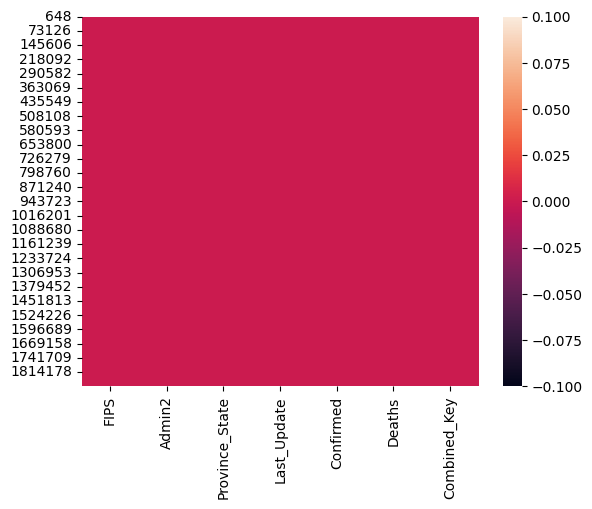

In [51]:
# Visually check for NaN values:
sb.heatmap(filtered_USA_data.isna())
plt.show()

There are no missing values in the data set.

In [52]:
filtered_USA_data.isna().sum()

FIPS              0
Admin2            0
Province_State    0
Last_Update       0
Confirmed         0
Deaths            0
Combined_Key      0
dtype: int64

**Change type/format of data**

In [53]:
filtered_USA_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1498322 entries, 648 to 1886647
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   FIPS            1498322 non-null  float64
 1   Admin2          1498322 non-null  object 
 2   Province_State  1498322 non-null  object 
 3   Last_Update     1498322 non-null  object 
 4   Confirmed       1498322 non-null  int64  
 5   Deaths          1498322 non-null  int64  
 6   Combined_Key    1498322 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 91.5+ MB


In [54]:
filtered_USA_data['Last_Update'] = pd.to_datetime(filtered_USA_data['Last_Update'])
filtered_USA_data["date"] = filtered_USA_data['Last_Update'].dt.strftime('%Y/%m/%d')
filtered_USA_data.head()

,FIPS,Admin2,Province_State,Last_Update,Confirmed,Deaths,Combined_Key,date
648,1001.0,Autauga,Alabama,2021-01-02 05:22:33,4239,50,"Autauga, Alabama, US",2021/01/02
649,1003.0,Baldwin,Alabama,2021-01-02 05:22:33,13823,169,"Baldwin, Alabama, US",2021/01/02
650,1005.0,Barbour,Alabama,2021-01-02 05:22:33,1517,33,"Barbour, Alabama, US",2021/01/02
651,1007.0,Bibb,Alabama,2021-01-02 05:22:33,1854,46,"Bibb, Alabama, US",2021/01/02
652,1009.0,Blount,Alabama,2021-01-02 05:22:33,4693,63,"Blount, Alabama, US",2021/01/02


Remove Last_Update column:

In [55]:
filtered_USA_data.drop('Last_Update',axis=1, inplace=True)
filtered_USA_data.head()

,FIPS,Admin2,Province_State,Confirmed,Deaths,Combined_Key,date
648,1001.0,Autauga,Alabama,4239,50,"Autauga, Alabama, US",2021/01/02
649,1003.0,Baldwin,Alabama,13823,169,"Baldwin, Alabama, US",2021/01/02
650,1005.0,Barbour,Alabama,1517,33,"Barbour, Alabama, US",2021/01/02
651,1007.0,Bibb,Alabama,1854,46,"Bibb, Alabama, US",2021/01/02
652,1009.0,Blount,Alabama,4693,63,"Blount, Alabama, US",2021/01/02


In [66]:
# Change type of FIPS to integer:
filtered_USA_data.FIPS = filtered_USA_data.FIPS.astype({"FIPS": "int64"})

In [67]:
filtered_USA_data.dtypes

FIPS               int64
Admin2            object
Province_State    object
Confirmed          int64
Deaths             int64
Combined_Key      object
date              object
dtype: object

Sort the values according to State, County, and date.

In [73]:
sorted_filtered_USA_data = filtered_USA_data.sort_values(["Province_State","Admin2",'date'], ascending=[True,True,True])
sorted_filtered_USA_data

,FIPS,Admin2,Province_State,Confirmed,Deaths,Combined_Key,date
1390839,1001,Autauga,Alabama,2168,31,"Autauga, Alabama, US",2020/11/01
1398835,1001,Autauga,Alabama,2182,31,"Autauga, Alabama, US",2020/11/02
1406831,1001,Autauga,Alabama,2195,31,"Autauga, Alabama, US",2020/11/03
1414827,1001,Autauga,Alabama,2210,31,"Autauga, Alabama, US",2020/11/04
1422823,1001,Autauga,Alabama,2229,31,"Autauga, Alabama, US",2020/11/05
...,...,...,...,...,...,...,...
320468,56045,Weston,Wyoming,1521,17,"Weston, Wyoming, US",2022/02/10
328482,56045,Weston,Wyoming,1523,17,"Weston, Wyoming, US",2022/02/11
336496,56045,Weston,Wyoming,1524,17,"Weston, Wyoming, US",2022/02/12
344510,56045,Weston,Wyoming,1524,17,"Weston, Wyoming, US",2022/02/13


Rename some columns and reset index:

In [74]:
sorted_filtered_USA_data.rename(columns={"Admin2": "County", "Province_State": "State", "Confirmed":"Cases", "Combined_Key":"Full_Location", "date":"Date"}, inplace=True)
sorted_filtered_USA_data.reset_index(inplace=True, drop=True)
sorted_filtered_USA_data

,FIPS,County,State,Cases,Deaths,Full_Location,Date
0,1001,Autauga,Alabama,2168,31,"Autauga, Alabama, US",2020/11/01
1,1001,Autauga,Alabama,2182,31,"Autauga, Alabama, US",2020/11/02
2,1001,Autauga,Alabama,2195,31,"Autauga, Alabama, US",2020/11/03
3,1001,Autauga,Alabama,2210,31,"Autauga, Alabama, US",2020/11/04
4,1001,Autauga,Alabama,2229,31,"Autauga, Alabama, US",2020/11/05
...,...,...,...,...,...,...,...
1498317,56045,Weston,Wyoming,1521,17,"Weston, Wyoming, US",2022/02/10
1498318,56045,Weston,Wyoming,1523,17,"Weston, Wyoming, US",2022/02/11
1498319,56045,Weston,Wyoming,1524,17,"Weston, Wyoming, US",2022/02/12
1498320,56045,Weston,Wyoming,1524,17,"Weston, Wyoming, US",2022/02/13


In [79]:
# drop duplicated rows:
sorted_filtered_USA_data.drop_duplicates(inplace=True)
sorted_filtered_USA_data

,FIPS,County,State,Cases,Deaths,Full_Location,Date
0,1001,Autauga,Alabama,2168,31,"Autauga, Alabama, US",2020/11/01
1,1001,Autauga,Alabama,2182,31,"Autauga, Alabama, US",2020/11/02
2,1001,Autauga,Alabama,2195,31,"Autauga, Alabama, US",2020/11/03
3,1001,Autauga,Alabama,2210,31,"Autauga, Alabama, US",2020/11/04
4,1001,Autauga,Alabama,2229,31,"Autauga, Alabama, US",2020/11/05
...,...,...,...,...,...,...,...
1498317,56045,Weston,Wyoming,1521,17,"Weston, Wyoming, US",2022/02/10
1498318,56045,Weston,Wyoming,1523,17,"Weston, Wyoming, US",2022/02/11
1498319,56045,Weston,Wyoming,1524,17,"Weston, Wyoming, US",2022/02/12
1498320,56045,Weston,Wyoming,1524,17,"Weston, Wyoming, US",2022/02/13


Save the resulting table as a csv file:

In [80]:
save_path = r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\raw_data'
sorted_filtered_USA_data.to_csv(os.path.join(save_path, 'clean_USA_data.csv'), index=False)

#### 4. Split the data frame in 51 smaller data frames, one for each state
- Only the data for the second COVID peak in the given state should be kept in the analysis.
- These dates are provided in **COVID19_US_counties_second_peak_dates.xlsx**

In [96]:
# load the dates:

second_peak_dates = pd.read_excel(r"C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\COVID19_US_counties_second_peak_dates.xlsx")
second_peak_dates

,start_date,end_date,state
0,2020-10-04,2021-06-15,Alabama
1,2020-09-11,2021-06-28,Alaska
2,2020-10-13,2021-06-20,Arizona
3,2020-09-10,2021-06-10,Arkansas
4,2020-10-30,2021-06-10,California
5,2020-09-12,2021-06-28,Colorado
6,2020-09-10,2021-06-26,Connecticut
7,2020-09-10,2021-06-22,Delaware
8,2020-10-01,2021-06-30,District of Columbia
9,2020-10-24,2021-06-10,Florida


start_date    datetime64[ns]
end_date      datetime64[ns]
state                 object
dtype: object

In [86]:
# Load the data (if not loaded already):
sorted_filtered_USA_data = pd.read_csv(r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\raw_data\clean_USA_data.csv')

In [87]:
states = sorted_filtered_USA_data.State.unique()
states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [90]:
sorted_filtered_USA_data

,FIPS,County,State,Cases,Deaths,Full_Location,Date
0,1001,Autauga,Alabama,2168,31,"Autauga, Alabama, US",2020/11/01
1,1001,Autauga,Alabama,2182,31,"Autauga, Alabama, US",2020/11/02
2,1001,Autauga,Alabama,2195,31,"Autauga, Alabama, US",2020/11/03
3,1001,Autauga,Alabama,2210,31,"Autauga, Alabama, US",2020/11/04
4,1001,Autauga,Alabama,2229,31,"Autauga, Alabama, US",2020/11/05
...,...,...,...,...,...,...,...
1495197,56045,Weston,Wyoming,1521,17,"Weston, Wyoming, US",2022/02/10
1495198,56045,Weston,Wyoming,1523,17,"Weston, Wyoming, US",2022/02/11
1495199,56045,Weston,Wyoming,1524,17,"Weston, Wyoming, US",2022/02/12
1495200,56045,Weston,Wyoming,1524,17,"Weston, Wyoming, US",2022/02/13


In [94]:
data_by_state_path = r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\data_by_state'
for state in states:
    one_state_df = sorted_filtered_USA_data[sorted_filtered_USA_data.State == state]
    one_state_df["Date"] = pd.to_datetime(one_state_df["Date"])
    start = second_peak_dates.start_date[second_peak_dates.state == state]
    end = second_peak_dates.end_date[second_peak_dates.state == state]
    one_state_df = one_state_df[(one_state_df.Date >= start) & (one_state_df.Date <= end)]
    filename = "".join([state, ".csv"])
    one_state_df.to_csv(os.path.join(data_by_state_path, filename), index=False)

In [119]:
state = "Alabama"
one_state_df = sorted_filtered_USA_data[sorted_filtered_USA_data.State == state]
one_state_df["Date"] = pd.to_datetime(one_state_df["Date"])
start = second_peak_dates.start_date[second_peak_dates.state == state]
end = second_peak_dates.end_date[second_peak_dates.state == state]
one_state_df = one_state_df[(one_state_df.Date >= start[0]) & (one_state_df.Date <= end[0])]
one_state_df

C:\Users\marko\AppData\Local\Temp\ipykernel_21692\52458390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_state_df["Date"] = pd.to_datetime(one_state_df["Date"])


,FIPS,County,State,Cases,Deaths,Full_Location,Date
0,1001,Autauga,Alabama,2168,31,"Autauga, Alabama, US",2020-11-01
1,1001,Autauga,Alabama,2182,31,"Autauga, Alabama, US",2020-11-02
2,1001,Autauga,Alabama,2195,31,"Autauga, Alabama, US",2020-11-03
3,1001,Autauga,Alabama,2210,31,"Autauga, Alabama, US",2020-11-04
4,1001,Autauga,Alabama,2229,31,"Autauga, Alabama, US",2020-11-05
...,...,...,...,...,...,...,...
31410,1133,Winston,Alabama,2834,73,"Winston, Alabama, US",2021-06-11
31411,1133,Winston,Alabama,2833,72,"Winston, Alabama, US",2021-06-12
31412,1133,Winston,Alabama,2833,72,"Winston, Alabama, US",2021-06-13
31413,1133,Winston,Alabama,2833,72,"Winston, Alabama, US",2021-06-14


In [121]:
f'Start: {start[0]}, End: {end[0]}'

'Start: 2020-10-04 00:00:00, End: 2021-06-15 00:00:00'

#### 5. Prepare single county data frames for the duration of the peak
- it would be useful to have the info on number of data points for each county.
- Since there are more than enough counties for training the model, those with too few data points should be removed
- It should next be decided if padding is needed
- Remove Alaska and Hawaii data together with other troubling counties
- Write a function to check for problematic counties


In [131]:
cases_per_county_path = r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\data_by_county\cases_by_county'
deaths_per_county_path = r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\data_by_county\deaths_by_county'
for state in states:
    one_state_df = sorted_filtered_USA_data[sorted_filtered_USA_data.State == state]
    one_state_df["Date"] = pd.to_datetime(one_state_df["Date"])
    start = second_peak_dates.start_date[second_peak_dates.state == state]
    end = second_peak_dates.end_date[second_peak_dates.state == state]
    one_state_df = one_state_df[(one_state_df.Date >= start[0]) & (one_state_df.Date <= end[0])]
    cases_state_data = one_state_df[["Date","Cases","FIPS"]].copy()
    deaths_state_data = one_state_df[["Date","Deaths","FIPS"]].copy()
    for county in one_state_df.FIPS.unique():
        # Cases
        one_county_cases = cases_state_data[cases_state_data.FIPS == county]
        one_county_cases.drop("FIPS",axis=1,inplace=True)
        cases_filename = "".join([str(county),"_cases.csv"])
        one_county_cases.to_csv(os.path.join(cases_per_county_path,cases_filename))

        one_county_deaths = deaths_state_data[deaths_state_data.FIPS == county]
        one_county_deaths.drop("FIPS",axis=1,inplace=True)
        deaths_filename = "".join([str(county),"_deaths.csv"])
        one_county_deaths.to_csv(os.path.join(deaths_per_county_path,deaths_filename))


C:\Users\marko\AppData\Local\Temp\ipykernel_21692\2322991611.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_state_df["Date"] = pd.to_datetime(one_state_df["Date"])
C:\Users\marko\AppData\Local\Temp\ipykernel_21692\2322991611.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_county_cases.drop("FIPS",axis=1,inplace=True)
C:\Users\marko\AppData\Local\Temp\ipykernel_21692\2322991611.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

KeyError: 0

'Alaska'

In [126]:
cases_state_data = one_state_df[["Date","Cases","FIPS"]].copy()
cases_state_data

,Date,Cases,FIPS
0,2020-11-01,2168,1001
1,2020-11-02,2182,1001
2,2020-11-03,2195,1001
3,2020-11-04,2210,1001
4,2020-11-05,2229,1001
...,...,...,...
31410,2021-06-11,2834,1133
31411,2021-06-12,2833,1133
31412,2021-06-13,2833,1133
31413,2021-06-14,2833,1133


In [127]:
cases_state_data.drop("FIPS",axis=1,inplace=True)
cases_state_data

,Date,Cases
0,2020-11-01,2168
1,2020-11-02,2182
2,2020-11-03,2195
3,2020-11-04,2210
4,2020-11-05,2229
...,...,...
31410,2021-06-11,2834
31411,2021-06-12,2833
31412,2021-06-13,2833
31413,2021-06-14,2833
